# Importing necessary libraries and downloading necessary packages

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# download stopwords package
import nltk
nltk.download('stopwords')

# download punkt package
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# connecting to google drive

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Intellihire

Mounted at /content/drive
/content/drive/MyDrive/Intellihire


# **MCQ Questions**

In [ ]:
# load the CSV file into a Pandas DataFrame

responses = pd.read_csv('/content/drive/MyDrive/Intellihire/Responses.csv')
responses

,EXT1,EXT2,EXT3,EXT4,EXT5,EST1,EST2,EST3,EST4,EST5,...,CSN1,CSN2,CSN3,CSN4,CSN5,OPN1,OPN2,OPN3,OPN4,OPN5
0,4,3,2,1,3,3,2,2,1,4,...,5,5,4,4,4,5,3,3,4,5


In [ ]:
# get the average answer to the each question group for the response

col_list = list(responses)
ext = col_list[0:5]
est = col_list[5:10]
agr = col_list[10:15]
csn = col_list[15:20]
opn = col_list[20:25]


res_df = pd.DataFrame()
res_df['extraversion'] = responses[ext].sum(axis=1)/5
res_df['neuroticism'] = responses[est].sum(axis=1)/5
res_df['agreeableness'] = responses[agr].sum(axis=1)/5
res_df['conscientiousness'] = responses[csn].sum(axis=1)/5
res_df['openness'] = responses[opn].sum(axis=1)/5

In [ ]:
# view the distribution of Big Five Traits in candidate based on the responses for the mcq questionnaire
res_df

,extraversion,neuroticism,agreeableness,conscientiousness,openness
0,2.6,2.4,4.4,4.4,4.0


In [ ]:
# save the above data into a csv file for future use

res_df.to_csv('mcq_scores.csv', index=False)

In [ ]:
# save the created csv file on google drive

!cp mcq_scores.csv "/content/drive/MyDrive/Intellihire"

cp: 'mcq_scores.csv' and '/content/drive/MyDrive/Intellihire/mcq_scores.csv' are the same file


# **Open-Ended Questions**

In [ ]:
# Openness - How often do you seek out new experiences or take risks?
# Concientiousness - How do you ensure that your work is completed accurately and on time?
# Extraversion - How do you feel about social situations and making new connections?
# Agreeableness - How do you handle feedback or criticism from others?
# Neuroticism - Can you tell me about a time when you had to deal with a difficult or stressful situation? How did you handle it?

# Loading the Data Set

In [ ]:
# load the CSV file into a Pandas DataFrame
responses_df = pd.read_csv('Open_ended.csv')

# Understading the Dataset

In [ ]:
# Check the dimensions of the DataFrame
print("Number of rows:", responses_df.shape[0])
print("Number of columns:", responses_df.shape[1])

Number of rows: 50
Number of columns: 5


In [ ]:
# Check the first few rows of the DataFrame
print(responses_df.head())

                                            Openness  \
0  I strongly believe that seeking out new experi...   
1  As someone who thrives on novelty and exciteme...   
2  While I am naturally inclined to seek out new ...   
3  Personal and professional growth are two of my...   
4  While I am not a natural risk-taker, I recogni...   

                                    Concientiousness  \
0  I prioritize my work according to deadlines an...   
1  I believe that accuracy and attention to detai...   
2  I manage my time effectively by planning ahead...   
3  To ensure that my work is accurate and complet...   
4  I believe that setting realistic goals is the ...   

                                        Extraversion  \
0  I'm quite comfortable in social situations and...   
1  I'm an outgoing person by nature, so social si...   
2  As someone who values personal relationships, ...   
3  While I wouldn't necessarily describe myself a...   
4  As someone who is naturally extroverted, I 

In [ ]:
# Check the data types of each column
print(responses_df.dtypes)

Openness            object
Concientiousness    object
Extraversion        object
Agreeableness       object
Neuroticism         object
dtype: object


In [ ]:
# Check summary statistics for numerical columns
print(responses_df.describe())

                                                 Openness  \
count                                                  50   
unique                                                 50   
top     I strongly believe that seeking out new experi...   
freq                                                    1   

                                         Concientiousness  \
count                                                  50   
unique                                                 50   
top     I prioritize my work according to deadlines an...   
freq                                                    1   

                                             Extraversion  \
count                                                  50   
unique                                                 50   
top     I'm quite comfortable in social situations and...   
freq                                                    1   

                                            Agreeableness  \
count                

In [ ]:
# Check the unique values in each column
for col in responses_df.columns:
    print(col, responses_df[col].unique())

Openness ["I strongly believe that seeking out new experiences and taking risks is one of the best ways to foster personal growth and development. Life is too short to stick to the same old routine day in and day out. When we challenge ourselves to step outside our comfort zone, we not only learn new skills and gain valuable experiences, but we also build resilience and confidence. That being said, I understand that taking risks can be scary and intimidating at times. It's important to strike a balance between being adventurous and being cautious, and to always weigh the potential benefits and drawbacks before making any major decisions."
 "As someone who thrives on novelty and excitement, I make it a point to seek out new experiences and take risks whenever possible. Whether it's trying a new hobby, exploring a new city, or taking on a challenging project at work, I find that these experiences help me stay engaged and motivated in all aspects of my life. Of course, not every risk pays

# Data Preprocessing

##I. Text Cleaning

In [ ]:
# Preprocess the text data
responses_df = responses_df.applymap(lambda x: x.lower() if isinstance(x, str) else x) # convert to lowercase
responses_df = responses_df.replace(to_replace=r'[^\w\s]', value='', regex=True) # remove non-word and non-whitespace characters
responses_df = responses_df.replace(to_replace=r'\d', value='', regex=True) # remove digits

##II. Tokenization

In [ ]:
# Tokenize the text data
responses_df['Openness'] = responses_df['Openness'].apply(word_tokenize)
responses_df['Concientiousness'] = responses_df['Concientiousness'].apply(word_tokenize)
responses_df['Extraversion'] = responses_df['Extraversion'].apply(word_tokenize)
responses_df['Agreeableness'] = responses_df['Agreeableness'].apply(word_tokenize)
responses_df['Neuroticism'] = responses_df['Neuroticism'].apply(word_tokenize)

##III. Stopword Removal

In [ ]:
# Remove stop words
stop_words = set(stopwords.words('english'))

responses_df['Openness'] = responses_df['Openness'].apply(lambda x: [word for word in x if word not in stop_words])
responses_df['Concientiousness'] = responses_df['Concientiousness'].apply(lambda x: [word for word in x if word not in stop_words])
responses_df['Extraversion'] = responses_df['Extraversion'].apply(lambda x: [word for word in x if word not in stop_words])
responses_df['Agreeableness'] = responses_df['Agreeableness'].apply(lambda x: [word for word in x if word not in stop_words])
responses_df['Neuroticism'] = responses_df['Neuroticism'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
responses_df['Openness'].head(2)

0    [strongly, believe, seeking, new, experiences,...
1    [someone, thrives, novelty, excitement, make, ...
Name: Openness, dtype: object

##IV. Lemmatization

In [ ]:
# why lematization and not stemming?

# Lemmatization aims to convert words to their base or dictionary form which would be a meaningful word.
# Stemming, on the other hand, is a simpler and more rule-based approach whcih converts the word into a word stem or root form which may not always be a valid word in the language.
# Since we need to to meaningful keywords we will be using Lemmatization.

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import pandas as pd

# initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# define function to lemmatize tokens
def lemmatize_tokens(tokens):
    # convert POS tag to WordNet format
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    # lemmatize tokens
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

    # return lemmatized tokens as a list
    return lemmas

# apply lemmatization function to column of dataframe
responses_df['Openness_lemmatized'] = responses_df['Openness'].apply(lemmatize_tokens)


In [ ]:
responses_df['Openness_lemmatized']

0     [strongly, believe, seek, new, experience, tak...
1     [someone, thrives, novelty, excitement, make, ...
2     [naturally, inclined, seek, new, experience, t...
3     [personal, professional, growth, two, top, pri...
4     [natural, risktaker, recognize, value, seek, n...
5     [someone, enjoys, take, risk, seek, new, exper...
6     [seek, new, experience, take, risk, powerful, ...
7     [explore, new, idea, try, new, thing, one, gre...
8     [seek, new, challenge, experience, key, part, ...
9     [seek, new, experience, take, risk, essential,...
10    [constantly, seek, new, experience, take, risk...
11    [make, point, seek, new, experience, take, cal...
12    [try, seek, new, experience, take, risk, whene...
13    [tend, somewhat, cautious, seek, new, experien...
14    [im, naturally, inclined, seek, new, experienc...
15    [try, seek, new, experience, take, risk, regul...
16    [believe, take, risk, important, part, persona...
17    [enjoy, explore, new, idea, try, new, thin

In [ ]:
# initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# define function to lemmatize tokens
def lemmatize_tokens(tokens):
    # convert POS tag to WordNet format
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    # lemmatize tokens
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

    # return lemmatized tokens as a list
    return lemmas

# apply lemmatization function to column of dataframe
responses_df['Concientiousness_lemmatized'] = responses_df['Concientiousness'].apply(lemmatize_tokens)

In [ ]:
responses_df['Concientiousness_lemmatized']

0     [prioritize, work, accord, deadline, level, im...
1     [believe, accuracy, attention, detail, critica...
2     [manage, time, effectively, planning, ahead, a...
3     [ensure, work, accurate, complete, time, follo...
4     [believe, set, realistic, goal, key, complete,...
5     [accuracy, timeliness, essential, project, tas...
6     [ensure, work, accurate, time, follow, systema...
7     [ensure, work, accurate, time, organize, proac...
8     [accuracy, timeliness, crucial, project, task,...
9     [im, perfectionist, heart, take, pride, ensure...
10    [ensure, work, complete, accurately, time, sta...
11    [accuracy, timeliness, critical, success, job,...
12    [ensure, work, complete, accurately, time, foc...
13    [ensure, work, complete, accurately, time, pri...
14    [communication, key, complete, work, accuratel...
15    [always, doublecheck, work, ensure, accurate, ...
16    [project, management, tool, like, trello, asan...
17    [complete, work, always, look, ahead, iden

In [ ]:
# initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# define function to lemmatize tokens
def lemmatize_tokens(tokens):
    # convert POS tag to WordNet format
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    # lemmatize tokens
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

    # return lemmatized tokens as a list
    return lemmas

# apply lemmatization function to column of dataframe
responses_df['Extraversion_lemmatized'] = responses_df['Extraversion'].apply(lemmatize_tokens)

In [ ]:
responses_df['Extraversion_lemmatized']

0     [im, quite, comfortable, social, situation, al...
1     [im, outgo, person, nature, social, situation,...
2     [someone, value, personal, relationship, im, a...
3     [wouldnt, necessarily, describe, extroverted, ...
4     [someone, naturally, extroverted, thrive, soci...
5     [ocial, situation, always, energize, enjoyable...
6     [someone, strong, interpersonal, skill, social...
7     [im, openminded, friendly, person, believe, he...
8     [im, good, listener, nature, think, help, succ...
9     [understand, building, connection, others, cru...
10    [introvert, tend, feel, comfortable, small, qu...
11    [social, situation, bit, overwhelm, introvert,...
12    [extrovert, absolutely, love, social, situatio...
13    [social, situation, definitely, comfort, zone,...
14    [extrovert, love, social, situation, meeting, ...
15    [introvert, social, situation, drain, still, e...
16    [social, situation, definitely, comfort, zone,...
17    [extrovert, thrive, social, situation, lov

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import pandas as pd

# initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# define function to lemmatize tokens
def lemmatize_tokens(tokens):
    # convert POS tag to WordNet format
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    # lemmatize tokens
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

    # return lemmatized tokens as a list
    return lemmas

# apply lemmatization function to column of dataframe
responses_df['Agreeableness_lemmatized'] = responses_df['Agreeableness'].apply(lemmatize_tokens)

In [ ]:
responses_df['Agreeableness_lemmatized']

0     [try, view, feedback, criticism, opportunity, ...
1     [initially, tough, receive, criticism, negativ...
2     [handle, feedback, stay, openminded, actively,...
3     [take, feedback, seriously, also, try, take, p...
4     [view, feedback, opportunity, strengthen, rela...
5     [take, proactive, approach, feedback, regularl...
6     [receive, feedback, try, stay, objective, focu...
7     [handle, feedback, take, ownership, mistake, s...
8     [try, approach, feedback, growth, mindset, see...
9     [receive, feedback, challenge, try, approach, ...
10    [believe, feedback, essential, part, personal,...
11    [handle, feedback, try, stay, objective, view,...
12    [receive, feedback, make, sure, stay, openmind...
13    [handle, feedback, use, tool, selfimprovement,...
14    [receive, feedback, try, take, balance, approa...
15    [handle, feedback, stay, focus, end, goal, rem...
16    [receive, feedback, try, view, opportunity, bu...
17    [handle, feedback, take, proactive, approa

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# define function to lemmatize tokens
def lemmatize_tokens(tokens):
    # convert POS tag to WordNet format
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    # lemmatize tokens
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

    # return lemmatized tokens as a list
    return lemmas

# apply lemmatization function to column of dataframe
responses_df['Neuroticism_lemmatized'] = responses_df['Neuroticism'].apply(lemmatize_tokens)

In [ ]:
responses_df['Neuroticism_lemmatized']

0     [face, difficult, situation, try, remain, calm...
1     [experience, one, effective, way, handle, stre...
2     [deal, stressful, situation, like, take, proac...
3     [find, deal, stressful, situation, communicati...
4     [experience, effective, way, handle, stressful...
5     [face, difficult, situation, like, take, step,...
6     [experience, one, best, way, handle, stressful...
7     [deal, stressful, situation, find, help, suppo...
8     [believe, preparation, key, handle, difficult,...
9     [experience, effective, way, handle, stressful...
10    [deal, stressful, situation, try, approach, pr...
11    [find, maintain, healthy, worklife, balance, e...
12    [face, difficult, situation, try, keep, positi...
13    [find, communication, key, manage, stressful, ...
14    [experience, take, collaborative, approach, pr...
15    [face, difficult, situation, approach, stay, c...
16    [believe, one, effective, way, handle, stressf...
17    [approach, handle, difficult, situation, s

# Word Cloud

Word cloud for Openness trait: 



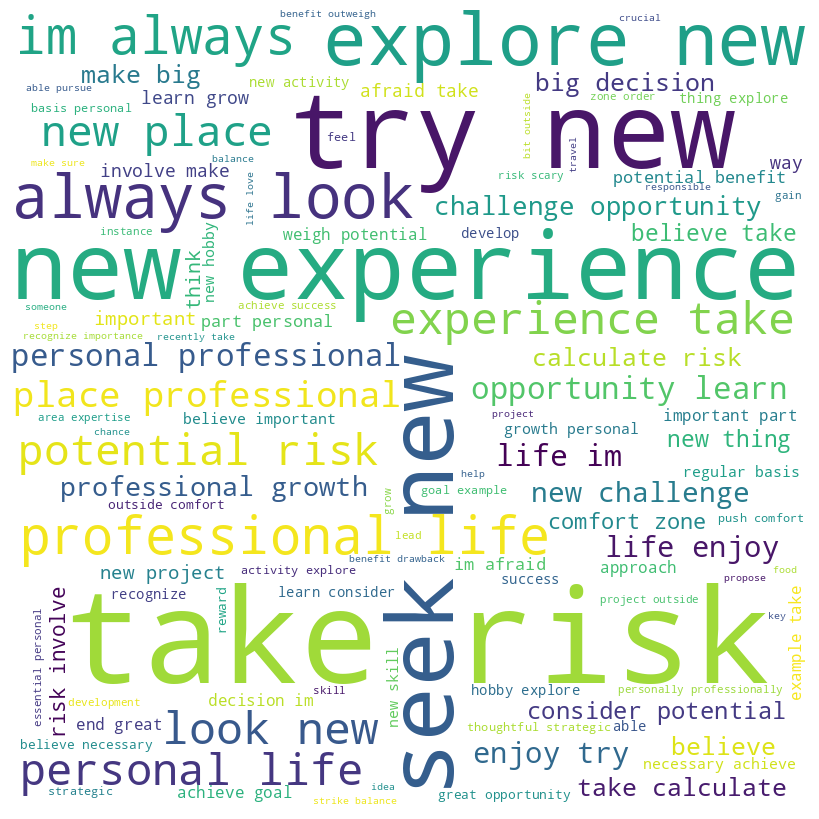

In [ ]:
# OPENNESS

print('Word cloud for Openness trait: \n')

# Concatenate all the lemmatized tokens into a single string
lemmatized_text = ' '.join([token for sublist in responses_df['Openness_lemmatized'] for token in sublist])

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(lemmatized_text)

# Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Word cloud for Concientiousness trait: 



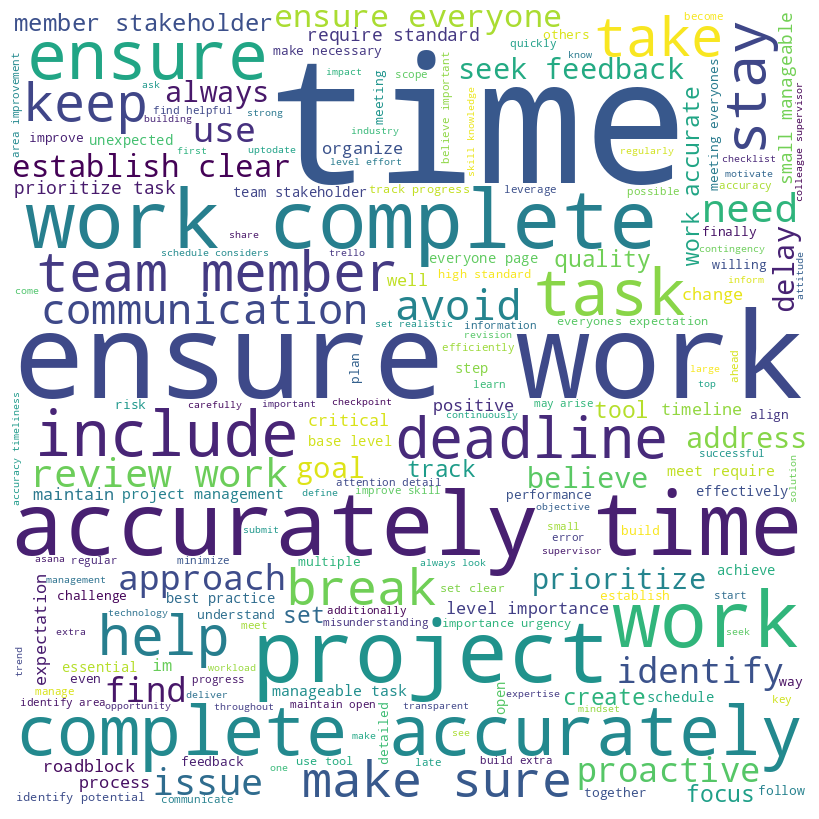

In [ ]:
# CONSCIENTIOUSNESS

print('Word cloud for Concientiousness trait: \n')

# Concatenate all the lemmatized tokens into a single string
lemmatized_text = ' '.join([token for sublist in responses_df['Concientiousness_lemmatized'] for token in sublist])

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(lemmatized_text)

# Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Word cloud for Extraversion trait: 



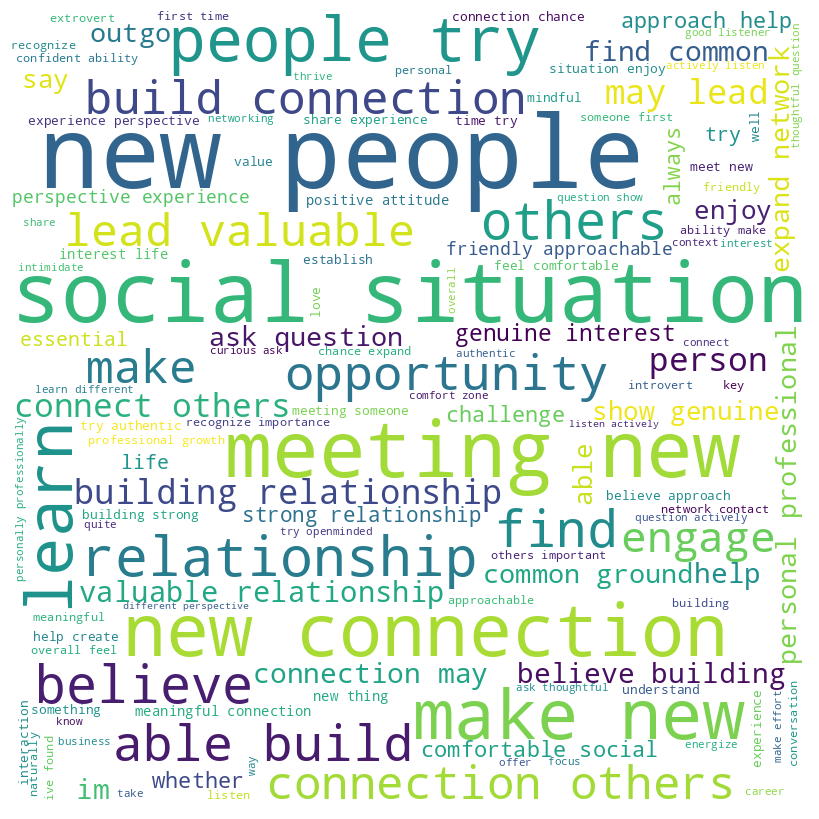

In [ ]:
# EXTRAVERSION

print('Word cloud for Extraversion trait: \n')

# Concatenate all the lemmatized tokens into a single string
lemmatized_text = ' '.join([token for sublist in responses_df['Extraversion_lemmatized'] for token in sublist])

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(lemmatized_text)

# Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Word cloud for Agreeableness trait: 



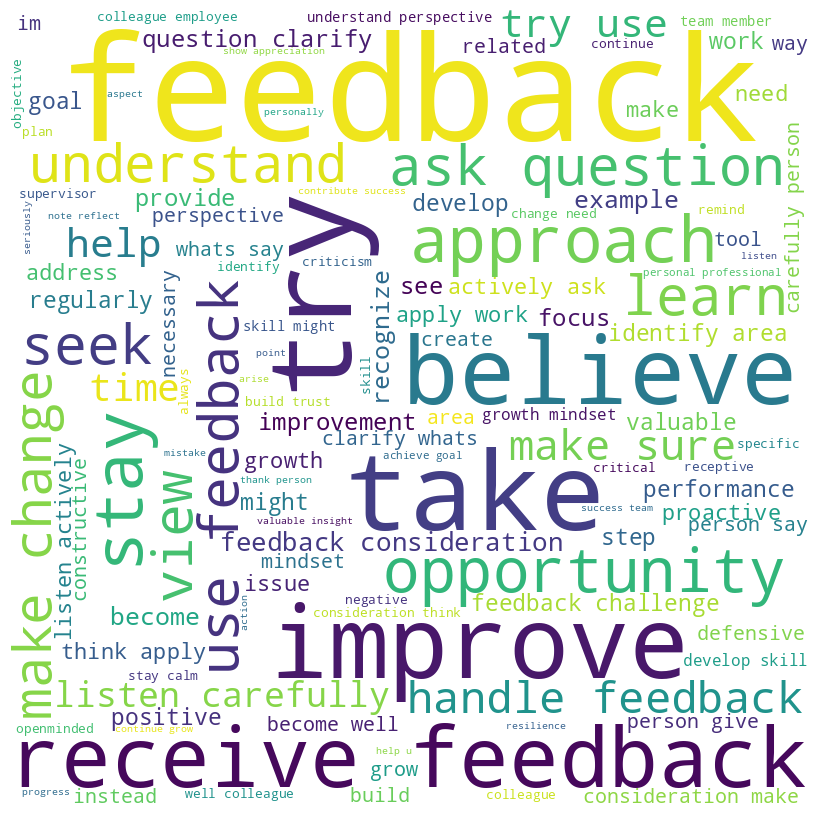

In [ ]:
# AGREEABLENESS

print('Word cloud for Agreeableness trait: \n')

# Concatenate all the lemmatized tokens into a single string
lemmatized_text = ' '.join([token for sublist in responses_df['Agreeableness_lemmatized'] for token in sublist])

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(lemmatized_text)

# Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Word cloud for Neuroticism trait: 



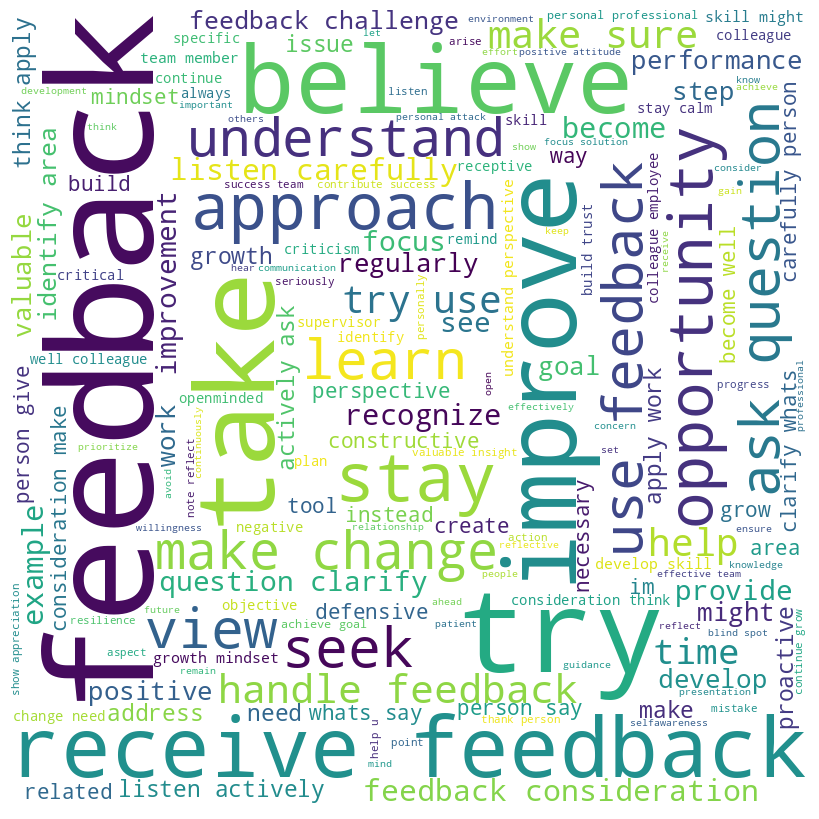

In [ ]:
# NEUROTICISM

print('Word cloud for Neuroticism trait: \n')

# Concatenate all the lemmatized tokens into a single string
lemmatized_text = ' '.join([token for sublist in responses_df['Agreeableness_lemmatized'] for token in sublist])

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(lemmatized_text)

# Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
# write selected columns of responses_df dataframe to a CSV file
selected_columns = ['Openness_lemmatized', 'Concientiousness_lemmatized', 'Extraversion_lemmatized', 'Agreeableness_lemmatized', 'Neuroticism_lemmatized']
new_column_names = {'Openness_lemmatized':'Openness', 'Concientiousness_lemmatized':'Concientiousness', 'Extraversion_lemmatized':'Extraversion', 'Agreeableness_lemmatized':'Agreeableness', 'Neuroticism_lemmatized':'Neuroticism'}
responses_df[selected_columns].rename(columns=new_column_names).to_csv('preprocessed.csv', index=False)

In [ ]:
# Authenticate and create the PyDrive client

!cp preprocessed.csv "/content/drive/MyDrive/Intellihire"

cp: 'preprocessed.csv' and '/content/drive/MyDrive/Intellihire/preprocessed.csv' are the same file


In [ ]:
# loading the clean dataset into a dataframe

df = pd.read_csv('preprocessed.csv')
df.head(10)

,Openness,Concientiousness,Extraversion,Agreeableness,Neuroticism
0,"['strongly', 'believe', 'seek', 'new', 'experi...","['prioritize', 'work', 'accord', 'deadline', '...","['im', 'quite', 'comfortable', 'social', 'situ...","['try', 'view', 'feedback', 'criticism', 'oppo...","['face', 'difficult', 'situation', 'try', 'rem..."
1,"['someone', 'thrives', 'novelty', 'excitement'...","['believe', 'accuracy', 'attention', 'detail',...","['im', 'outgo', 'person', 'nature', 'social', ...","['initially', 'tough', 'receive', 'criticism',...","['experience', 'one', 'effective', 'way', 'han..."
2,"['naturally', 'inclined', 'seek', 'new', 'expe...","['manage', 'time', 'effectively', 'planning', ...","['someone', 'value', 'personal', 'relationship...","['handle', 'feedback', 'stay', 'openminded', '...","['deal', 'stressful', 'situation', 'like', 'ta..."
3,"['personal', 'professional', 'growth', 'two', ...","['ensure', 'work', 'accurate', 'complete', 'ti...","['wouldnt', 'necessarily', 'describe', 'extrov...","['take', 'feedback', 'seriously', 'also', 'try...","['find', 'deal', 'stressful', 'situation', 'co..."
4,"['natural', 'risktaker', 'recognize', 'value',...","['believe', 'set', 'realistic', 'goal', 'key',...","['someone', 'naturally', 'extroverted', 'thriv...","['view', 'feedback', 'opportunity', 'strengthe...","['experience', 'effective', 'way', 'handle', '..."
5,"['someone', 'enjoys', 'take', 'risk', 'seek', ...","['accuracy', 'timeliness', 'essential', 'proje...","['ocial', 'situation', 'always', 'energize', '...","['take', 'proactive', 'approach', 'feedback', ...","['face', 'difficult', 'situation', 'like', 'ta..."
6,"['seek', 'new', 'experience', 'take', 'risk', ...","['ensure', 'work', 'accurate', 'time', 'follow...","['someone', 'strong', 'interpersonal', 'skill'...","['receive', 'feedback', 'try', 'stay', 'object...","['experience', 'one', 'best', 'way', 'handle',..."
7,"['explore', 'new', 'idea', 'try', 'new', 'thin...","['ensure', 'work', 'accurate', 'time', 'organi...","['im', 'openminded', 'friendly', 'person', 'be...","['handle', 'feedback', 'take', 'ownership', 'm...","['deal', 'stressful', 'situation', 'find', 'he..."
8,"['seek', 'new', 'challenge', 'experience', 'ke...","['accuracy', 'timeliness', 'crucial', 'project...","['im', 'good', 'listener', 'nature', 'think', ...","['try', 'approach', 'feedback', 'growth', 'min...","['believe', 'preparation', 'key', 'handle', 'd..."
9,"['seek', 'new', 'experience', 'take', 'risk', ...","['im', 'perfectionist', 'heart', 'take', 'prid...","['understand', 'building', 'connection', 'othe...","['receive', 'feedback', 'challenge', 'try', 'a...","['experience', 'effective', 'way', 'handle', '..."


# Keyword Extraction

##I. Bag of Words Representation

In [ ]:
# OPENNESS

# Create a bag of words representation of the text data
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(responses_df['Openness_lemmatized'].apply(lambda x: ' '.join(x)))

# Get the sum of the counts of each word in the corpus
sum_words = bag_of_words.sum(axis=0)

# Get the frequency of each word in the corpus
word_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# Sort the list of words by frequency in descending order
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Print the top 10 most common words
print('Bag of words representation for Openness trait:\n')

Openness_top25 = []

for word, freq in word_freq[:25]:
    print(word, freq)
    Openness_top25.append(word)

Bag of words representation for Openness trait:

new 206
risk 136
take 123
life 74
personal 64
professional 63
believe 59
try 59
opportunity 54
experience 53
learn 51
im 50
always 48
potential 48
challenge 44
seek 40
make 40
growth 39
look 37
explore 36
important 35
place 31
enjoy 30
decision 27
big 26


In [ ]:
# CONCIENTIOUSNESS

# Create a bag of words representation of the text data
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(responses_df['Concientiousness_lemmatized'].apply(lambda x: ' '.join(x)))

# Get the sum of the counts of each word in the corpus
sum_words = bag_of_words.sum(axis=0)

# Get the frequency of each word in the corpus
word_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# Sort the list of words by frequency in descending order
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Print the top 10 most common words
print('Bag of words representation for Concientiousness trait:\n')

Concientiousness_top25 = []

for word, freq in word_freq[:25]:
    print(word, freq)
    Concientiousness_top25.append(word)

Bag of words representation for Concientiousness trait:

work 133
time 89
ensure 82
complete 63
project 47
accurately 45
task 42
also 27
team 27
include 26
make 24
deadline 21
stay 20
member 19
help 19
identify 19
take 18
everyone 18
prioritize 17
keep 17
stakeholder 17
clear 17
communication 16
set 16
break 16


In [ ]:
# EXTRAVERSION

# Create a bag of words representation of the text data
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(responses_df['Extraversion_lemmatized'].apply(lambda x: ' '.join(x)))

# Get the sum of the counts of each word in the corpus
sum_words = bag_of_words.sum(axis=0)

# Get the frequency of each word in the corpus
word_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# Sort the list of words by frequency in descending order
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Print the top 10 most common words
print('Bag of words representation for Extraversion trait:\n')

Extraversion_top25 = []

for word, freq in word_freq[:25]:
    print(word, freq)
    Extraversion_top25.append(word)

Bag of words representation for Extraversion trait:

new 116
connection 94
people 75
make 65
social 63
relationship 60
situation 58
try 58
meeting 56
others 56
believe 40
building 39
learn 37
build 33
find 32
experience 29
able 29
help 28
also 25
valuable 24
interest 23
may 22
professional 20
life 20
perspective 20


In [ ]:
# AGREEABLENESS

# Create a bag of words representation of the text data
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(responses_df['Agreeableness_lemmatized'].apply(lambda x: ' '.join(x)))

# Get the sum of the counts of each word in the corpus
sum_words = bag_of_words.sum(axis=0)

# Get the frequency of each word in the corpus
word_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# Sort the list of words by frequency in descending order
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Print the top 10 most common words
print('Bag of words representation for Agreeableness trait:\n')

Agreeableness_top25 = []

for word, freq in word_freq[:25]:
    print(word, freq)
    Agreeableness_top25.append(word)

Bag of words representation for Agreeableness trait:

feedback 184
try 69
take 51
improve 43
receive 41
make 40
believe 38
stay 28
use 27
ask 23
listen 22
person 22
approach 21
understand 20
opportunity 19
skill 17
question 16
change 16
become 16
help 16
view 15
learn 15
colleague 15
seek 15
work 15


In [ ]:
# NEUROTICISM

# Create a bag of words representation of the text data
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(responses_df['Neuroticism_lemmatized'].apply(lambda x: ' '.join(x)))

# Get the sum of the counts of each word in the corpus
sum_words = bag_of_words.sum(axis=0)

# Get the frequency of each word in the corpus
word_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# Sort the list of words by frequency in descending order
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Print the top 10 most common words
print('Bag of words representation for Neuroticism trait:\n')

Neuroticism_top25= []

for word, freq in word_freq[:25]:
    print(word, freq)
    Neuroticism_top25.append(word)

Bag of words representation for Neuroticism trait:

situation 62
stay 62
try 45
help 43
take 35
problem 34
make 32
difficult 30
find 29
manage 27
stress 27
solution 26
also 25
approach 25
challenge 25
focus 24
stressful 24
able 22
face 21
break 19
handle 19
work 17
well 16
maintain 15
team 15


##II. TF-IDF Vectorizer

In [ ]:
# OPENNESS

# create a TfidfVectorizer
tfidf = TfidfVectorizer()

# fit and transform the text column
tfidf_matrix = tfidf.fit_transform(df['Openness'])

# get the sum of the TF-IDF scores for each word
tfidf_sum = tfidf_matrix.sum(axis=0)

# convert the sum to a list of tuples (word, score)
word_scores = [(word, tfidf_sum[0, idx]) for word, idx in tfidf.vocabulary_.items()]

# sort the list by score (in descending order)
word_scores.sort(key=lambda x: x[1], reverse=True)

# print the top 10 most frequent words
print('Most frequently used words for Openness trait:\n')

Openness_tokens = []

for word, score in word_scores[:25]:
    #print(f'{word}: {score}')
    Openness_tokens.append(word)

print(Openness_tokens)

Most frequently used words for Openness trait:

['new', 'risk', 'take', 'life', 'im', 'professional', 'personal', 'try', 'believe', 'learn', 'opportunity', 'potential', 'always', 'important', 'make', 'experience', 'challenge', 'growth', 'look', 'explore', 'enjoy', 'seek', 'place', 'big', 'decision']


In [ ]:
# CONCIENTIOUSNESS

# create a TfidfVectorizer
tfidf = TfidfVectorizer()

# fit and transform the text column
tfidf_matrix = tfidf.fit_transform(df['Concientiousness'])

# get the sum of the TF-IDF scores for each word
tfidf_sum = tfidf_matrix.sum(axis=0)

# convert the sum to a list of tuples (word, score)
word_scores = [(word, tfidf_sum[0, idx]) for word, idx in tfidf.vocabulary_.items()]

# sort the list by score (in descending order)
word_scores.sort(key=lambda x: x[1], reverse=True)

# print the top 10 most frequent words
print('Most frequently used words for Concientiousness trait:\n')

Concientiousness_tokens = []

for word, score in word_scores[:25]:
    #print(f'{word}: {score}')
    Concientiousness_tokens.append(word)

print(Concientiousness_tokens)

Most frequently used words for Concientiousness trait:

['work', 'time', 'ensure', 'task', 'complete', 'project', 'accurately', 'team', 'include', 'also', 'make', 'deadline', 'clear', 'stay', 'communication', 'everyone', 'member', 'keep', 'help', 'take', 'identify', 'establish', 'require', 'prioritize', 'stakeholder']


In [ ]:
# EXTRAVERSION

# create a TfidfVectorizer
tfidf = TfidfVectorizer()

# fit and transform the text column
tfidf_matrix = tfidf.fit_transform(df['Extraversion'])

# get the sum of the TF-IDF scores for each word
tfidf_sum = tfidf_matrix.sum(axis=0)

# convert the sum to a list of tuples (word, score)
word_scores = [(word, tfidf_sum[0, idx]) for word, idx in tfidf.vocabulary_.items()]

# sort the list by score (in descending order)
word_scores.sort(key=lambda x: x[1], reverse=True)

# print the top 10 most frequent words
print('Most frequently used words for Extraversion trait:\n')

Extraversion_tokens = []

for word, score in word_scores[:25]:
    #print(f'{word}: {score}')
    Extraversion_tokens.append(word)

print(Extraversion_tokens)

Most frequently used words for Extraversion trait:

['new', 'connection', 'people', 'make', 'try', 'others', 'relationship', 'social', 'meeting', 'situation', 'able', 'building', 'learn', 'build', 'believe', 'find', 'experience', 'help', 'may', 'valuable', 'also', 'interest', 'life', 'opportunity', 'professional']


In [ ]:
# AGREEABLENESS

# create a TfidfVectorizer
tfidf = TfidfVectorizer()

# fit and transform the text column
tfidf_matrix = tfidf.fit_transform(df['Agreeableness'])

# get the sum of the TF-IDF scores for each word
tfidf_sum = tfidf_matrix.sum(axis=0)

# convert the sum to a list of tuples (word, score)
word_scores = [(word, tfidf_sum[0, idx]) for word, idx in tfidf.vocabulary_.items()]

# sort the list by score (in descending order)
word_scores.sort(key=lambda x: x[1], reverse=True)

# print the top 10 most frequent words
print('Most frequently used words for Agreeableness trait:\n')

Agreeableness_tokens = []

for word, score in word_scores[:25]:
    #print(f'{word}: {score}')
    Agreeableness_tokens.append(word)

print(Agreeableness_tokens)

Most frequently used words for Agreeableness trait:

['feedback', 'try', 'take', 'improve', 'make', 'believe', 'use', 'receive', 'stay', 'approach', 'understand', 'ask', 'person', 'listen', 'learn', 'opportunity', 'growth', 'mindset', 'skill', 'seek', 'view', 'work', 'change', 'become', 'help']


In [ ]:
# NEUROTICISM

# create a TfidfVectorizer
tfidf = TfidfVectorizer()

# fit and transform the text column
tfidf_matrix = tfidf.fit_transform(df['Neuroticism'])

# get the sum of the TF-IDF scores for each word
tfidf_sum = tfidf_matrix.sum(axis=0)

# convert the sum to a list of tuples (word, score)
word_scores = [(word, tfidf_sum[0, idx]) for word, idx in tfidf.vocabulary_.items()]

# sort the list by score (in descending order)
word_scores.sort(key=lambda x: x[1], reverse=True)

# print the top 10 most frequent words
print('Most frequently used words for Neuroticism trait:\n')

Neuroticism_tokens = []

for word, score in word_scores[:25]:
    #print(f'{word}: {score}')
    Neuroticism_tokens.append(word)

print(Neuroticism_tokens)

Most frequently used words for Neuroticism trait:

['stay', 'situation', 'try', 'help', 'take', 'problem', 'make', 'find', 'stress', 'solution', 'manage', 'difficult', 'focus', 'approach', 'challenge', 'stressful', 'also', 'able', 'break', 'face', 'handle', 'well', 'maintain', 'task', 'effectively']


In [ ]:
# put the extracted tokens for the five traits into a dataframe

tfidf_tokens = pd.DataFrame({'Openness_tokens': Openness_tokens, 'Concientiousness_tokens': Concientiousness_tokens, 'Extraversion_tokens': Extraversion_tokens, 'Agreeableness_tokens':Agreeableness_tokens, 'Neuroticism_tokens':Neuroticism_tokens})
tfidf_tokens

##III. keyBERT

In [ ]:
pip install keybert

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.6 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23777 sha256=f16409dac9b94279f27deb597b078a5ec433fd8474793962b4df8c5f3a70118f
  Stored in directory: /root/.cache/pip/wheels/66/8d/e6/b0e2f8d883b0fd51819226f67ad9843e04913ce4a97241ff4b
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=8dc51dd0464c264740a10efb3c01592125188ebf28433a9fb605b7882c88d3dd
 

In [ ]:
# def extract_keywords_from_dataframe(df, text_column, num_keywords=5):
#     # Initialize the KeyBERT model
#     model = KeyBERT()

#     # Extract keywords for each text in the specified column
#     keyword_list = []
#     for text in df[text_column]:
#         keywords = model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english', top_n=num_keywords)
#         keyword_list.append([keyword for keyword, _ in keywords])

#     # Return the list of extracted keywords
#     return keyword_list


In [ ]:
from keybert import KeyBERT

def extract_keywords_from_dataframe(df, text_column, num_keywords=5):
    # Initialize the KeyBERT model
    model = KeyBERT()

    # Concatenate all text phrases in the column into a single string
    text = ' '.join(df[text_column])

    # Extract keywords from the concatenated text
    keywords = model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english', top_n=num_keywords)

    # Return the extracted keywords
    return [keyword for keyword, _ in keywords]


In [ ]:
import pandas as pd

# Extract keywords from the 'Openness' column
Openness_keywords_BERT = extract_keywords_from_dataframe(df, 'Openness', num_keywords=25)

# Print the extracted keywords for the whole column
print(f"{Openness_keywords_BERT}")

['adventurousness', 'adventurous', 'thrill', 'motivate', 'risktaking', 'lifelong', 'strength', 'willingness', 'skill', 'meaningful', 'experience', 'endeavor', 'explore', 'develop', 'potential', 'passion', 'risk', 'decisionmaking', 'activity', 'strong', 'knowledge', 'hobby', 'risktaker', 'life', 'expertise']


In [ ]:
import pandas as pd

# Extract keywords from the 'Openness' column
Concientiousness_keywords_BERT = extract_keywords_from_dataframe(df, 'Concientiousness', num_keywords=25)

# Print the extracted keywords for the whole column
print(f"{Concientiousness_keywords_BERT}")


['task', 'outline', 'checklist', 'list', 'decisionmaking', 'teamwork', 'organize', 'completion', 'activity', 'priority', 'urgency', 'grammarcheck', 'expertise', 'editor', 'progress', 'workload', 'initiative', 'overwhelmed', 'manage', 'guide', 'milestone', 'management', 'procrastination', 'revision', 'productivity']


In [ ]:
import pandas as pd

# Extract keywords from the 'Openness' column
Extraversion_keywords_BERT = extract_keywords_from_dataframe(df, 'Extraversion', num_keywords=25)

# Print the extracted keywords for the whole column
print(f"{Extraversion_keywords_BERT}")

['meaningful', 'interpersonal', 'enjoyable', 'thoughtfulness', 'personality', 'thoughtful', 'mindful', 'empathy', 'humility', 'rapport', 'relationship', 'conversation', 'respectful', 'language', 'personable', 'group', 'friendly', 'meeting', 'social', 'socialize', 'mind', 'actively', 'partner', 'collaboration', 'honesty']


In [ ]:
import pandas as pd

# Extract keywords from the 'Openness' column
Agreeableness_keywords_BERT = extract_keywords_from_dataframe(df, 'Agreeableness', num_keywords=25)

# Print the extracted keywords for the whole column
print(f"{Agreeableness_keywords_BERT}")

['feedback', 'criticism', 'coworkers', 'supervisor', 'attentively', 'mentor', 'rapport', 'colleague', 'appreciation', 'constructive', 'productive', 'teamwork', 'continually', 'excellence', 'skill', 'receptive', 'professional', 'gratitude', 'example', 'conversation', 'progress', 'activity', 'review', 'develop', 'collaborate']


In [ ]:
import pandas as pd

# Extract keywords from the 'Openness' column
Neuroticism_keywords_BERT = extract_keywords_from_dataframe(df, 'Neuroticism', num_keywords=25)

# Print the extracted keywords for the whole column
print(f"{Neuroticism_keywords_BERT}")

['methodical', 'stressmanagement', 'task', 'activity', 'motivate', 'worklife', 'stressful', 'overwhelmed', 'manageable', 'decisionmaking', 'skill', 'stress', 'manage', 'tension', 'brainstorming', 'involves', 'ease', 'creative', 'expertise', 'inspire', 'collaborative', 'focus', 'solutionfocused', 'strength', 'guide']


# Candidate Responses

In [ ]:
# OPENNESS
openness_response = "I am someone who enjoys taking on new challenges and seeking out new experiences. I believe that by pushing myself out of my comfort zone, I am able to learn and grow both professionally and personally. In my previous roles, I have taken on new projects and tasks that were outside of my immediate area of expertise, and I found these experiences to be incredibly rewarding. Of course, I always make sure to assess the risks involved before taking on a new challenge, but I am not afraid to take calculated risks in order to achieve my goals. Overall, I would say that I am someone who is open to new experiences and willing to take risks when the situation calls for it."
concientiousness_response = "I ensure accurate and timely completion of work by breaking down projects into manageable tasks and prioritizing based on importance and urgency. I use productivity tools and communicate regularly with my team to track progress and address issues early. Seeking feedback from colleagues and stakeholders, taking ownership of my work, and being willing to put in extra effort are also important to me in ensuring successful completion of projects."
extraversion_response = "I am a very sociable person and enjoy meeting new people. I thrive in social situations and find that making new connections is both exciting and fulfilling. I am comfortable striking up conversations with strangers and find it easy to connect with people from different backgrounds and cultures. I believe that building new connections is important not only for personal growth but also for professional development, and I am always eager to expand my network and learn from others."
agreeableness_response = "I handle feedback and criticism from others constructively and positively. Firstly, I listen carefully to the feedback and try to understand the perspective of the person providing it. I ask clarifying questions to gain a better understanding of their expectations and how I can improve. I do not take the feedback personally and remain open to suggestions for improvement. I then take time to reflect on the feedback and develop an action plan to address any areas for improvement. I am proactive in seeking feedback and view it as an opportunity to learn and grow professionally. Ultimately, I strive to use feedback to improve my performance and achieve better outcomes in my work."
neuroticism_response = "Sure, there was a time when I was working on a project with a tight deadline, and we were faced with a setback due to unforeseen technical difficulties. I took a step back, analyzed the situation, and communicated openly with my team about the issue. I then researched and proposed several solutions, and we worked together to select the best option. Despite the added pressure and long hours, I remained calm and focused on the task at hand. In the end, we were able to overcome the challenge and complete the project on time, with a successful outcome. This experience taught me the importance of staying calm under pressure, maintaining clear communication, and being proactive in finding solutions to difficult situations."

# Preprocessing Candidate Response

##I.TF-IDF

In [ ]:
# OPENNESS

# take all the words in the candidate response into a list
openness_response_words = openness_response.split()

# CONVERT TO LOWERCASE
# Convert all words in the list to lowercase using list comprehension
openness_response_words = [word.lower() for word in openness_response_words]


# STOPWORD REMOVAL
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus if not already downloaded
nltk.download('stopwords')

# Get the set of stopwords
stop_words = set(stopwords.words('english'))

# Remove the stopwords from the list
openness_response_words = [word for word in openness_response_words if word.lower() not in stop_words]


# LEMMATIZATION
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize all words in the list using list comprehension
openness_response_words = [lemmatizer.lemmatize(word, pos='v') for word in openness_response_words]

# Print the lemmatized list
print(openness_response_words, '\n')

['someone', 'enjoy', 'take', 'new', 'challenge', 'seek', 'new', 'experiences.', 'believe', 'push', 'comfort', 'zone,', 'able', 'learn', 'grow', 'professionally', 'personally.', 'previous', 'roles,', 'take', 'new', 'project', 'task', 'outside', 'immediate', 'area', 'expertise,', 'find', 'experience', 'incredibly', 'rewarding.', 'course,', 'always', 'make', 'sure', 'assess', 'risk', 'involve', 'take', 'new', 'challenge,', 'afraid', 'take', 'calculate', 'risk', 'order', 'achieve', 'goals.', 'overall,', 'would', 'say', 'someone', 'open', 'new', 'experience', 'will', 'take', 'risk', 'situation', 'call', 'it.'] 



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# CONCIENTIOUSNESS

# take all the words in the candidate response into a list
concientiousness_response_words = concientiousness_response.split()

# CONVERT TO LOWERCASE
# Convert all words in the list to lowercase using list comprehension
concientiousness_response_words = [word.lower() for word in concientiousness_response_words]


# STOPWORD REMOVAL
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus if not already downloaded
nltk.download('stopwords')

# Get the set of stopwords
stop_words = set(stopwords.words('english'))

# Remove the stopwords from the list
concientiousness_response_words = [word for word in concientiousness_response_words if word.lower() not in stop_words]


# LEMMATIZATION
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize all words in the list using list comprehension
concientiousness_response_words = [lemmatizer.lemmatize(word, pos='v') for word in concientiousness_response_words]

# Print the lemmatized list
print(concientiousness_response_words, '\n')

['ensure', 'accurate', 'timely', 'completion', 'work', 'break', 'project', 'manageable', 'task', 'prioritize', 'base', 'importance', 'urgency.', 'use', 'productivity', 'tool', 'communicate', 'regularly', 'team', 'track', 'progress', 'address', 'issue', 'early.', 'seek', 'feedback', 'colleagues', 'stakeholders,', 'take', 'ownership', 'work,', 'will', 'put', 'extra', 'effort', 'also', 'important', 'ensure', 'successful', 'completion', 'projects.'] 



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# EXTRAVERSION

# take all the words in the candidate response into a list
extraversion_response_words = extraversion_response.split()

# CONVERT TO LOWERCASE
# Convert all words in the list to lowercase using list comprehension
extraversion_response_words = [word.lower() for word in extraversion_response_words]


# STOPWORD REMOVAL
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus if not already downloaded
nltk.download('stopwords')

# Get the set of stopwords
stop_words = set(stopwords.words('english'))

# Remove the stopwords from the list
extraversion_response_words = [word for word in extraversion_response_words if word.lower() not in stop_words]


# LEMMATIZATION
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize all words in the list using list comprehension
extraversion_response_words = [lemmatizer.lemmatize(word, pos='v') for word in extraversion_response_words]

# Print the lemmatized list
print(extraversion_response_words, '\n')

['sociable', 'person', 'enjoy', 'meet', 'new', 'people.', 'thrive', 'social', 'situations', 'find', 'make', 'new', 'connections', 'excite', 'fulfilling.', 'comfortable', 'strike', 'conversations', 'strangers', 'find', 'easy', 'connect', 'people', 'different', 'background', 'cultures.', 'believe', 'build', 'new', 'connections', 'important', 'personal', 'growth', 'also', 'professional', 'development,', 'always', 'eager', 'expand', 'network', 'learn', 'others.'] 



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# AGREEABLENESS

# take all the words in the candidate response into a list
agreeableness_response_words = agreeableness_response.split()

# CONVERT TO LOWERCASE
# Convert all words in the list to lowercase using list comprehension
agreeableness_response_words = [word.lower() for word in agreeableness_response_words]


# STOPWORD REMOVAL
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus if not already downloaded
nltk.download('stopwords')

# Get the set of stopwords
stop_words = set(stopwords.words('english'))

# Remove the stopwords from the list
agreeableness_response_words = [word for word in agreeableness_response_words if word.lower() not in stop_words]


# LEMMATIZATION
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize all words in the list using list comprehension
agreeableness_response_words = [lemmatizer.lemmatize(word, pos='v') for word in agreeableness_response_words]

# Print the lemmatized list
print(agreeableness_response_words, '\n')

['handle', 'feedback', 'criticism', 'others', 'constructively', 'positively.', 'firstly,', 'listen', 'carefully', 'feedback', 'try', 'understand', 'perspective', 'person', 'provide', 'it.', 'ask', 'clarify', 'question', 'gain', 'better', 'understand', 'expectations', 'improve.', 'take', 'feedback', 'personally', 'remain', 'open', 'suggestions', 'improvement.', 'take', 'time', 'reflect', 'feedback', 'develop', 'action', 'plan', 'address', 'areas', 'improvement.', 'proactive', 'seek', 'feedback', 'view', 'opportunity', 'learn', 'grow', 'professionally.', 'ultimately,', 'strive', 'use', 'feedback', 'improve', 'performance', 'achieve', 'better', 'outcomes', 'work.'] 



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# NEUROTICISM

# take all the words in the candidate response into a list
neuroticism_response_words = neuroticism_response.split()

# CONVERT TO LOWERCASE
# Convert all words in the list to lowercase using list comprehension
neuroticism_response_words = [word.lower() for word in neuroticism_response_words]


# STOPWORD REMOVAL
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus if not already downloaded
nltk.download('stopwords')

# Get the set of stopwords
stop_words = set(stopwords.words('english'))

# Remove the stopwords from the list
neuroticism_response_words = [word for word in neuroticism_response_words if word.lower() not in stop_words]


# LEMMATIZATION
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize all words in the list using list comprehension
neuroticism_response_words = [lemmatizer.lemmatize(word, pos='v') for word in neuroticism_response_words]

# Print the lemmatized list
print(neuroticism_response_words, '\n')

['sure,', 'time', 'work', 'project', 'tight', 'deadline,', 'face', 'setback', 'due', 'unforeseen', 'technical', 'difficulties.', 'take', 'step', 'back,', 'analyze', 'situation,', 'communicate', 'openly', 'team', 'issue.', 'research', 'propose', 'several', 'solutions,', 'work', 'together', 'select', 'best', 'option.', 'despite', 'add', 'pressure', 'long', 'hours,', 'remain', 'calm', 'focus', 'task', 'hand.', 'end,', 'able', 'overcome', 'challenge', 'complete', 'project', 'time,', 'successful', 'outcome.', 'experience', 'teach', 'importance', 'stay', 'calm', 'pressure,', 'maintain', 'clear', 'communication,', 'proactive', 'find', 'solutions', 'difficult', 'situations.'] 



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##II.BERT

In [ ]:
# OPENNESS

# take all the words in the candidate response into a list
openness_response_words = openness_response.split()

# CONVERT TO LOWERCASE
# Convert all words in the list to lowercase using list comprehension
openness_response_words = [word.lower() for word in openness_response_words]


# STOPWORD REMOVAL
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus if not already downloaded
nltk.download('stopwords')

# Get the set of stopwords
stop_words = set(stopwords.words('english'))

# Remove the stopwords from the list
openness_response_words = [word for word in openness_response_words if word.lower() not in stop_words]


# LEMMATIZATION
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize all words in the list using list comprehension
openness_response_words = [lemmatizer.lemmatize(word, pos='v') for word in openness_response_words]

# Print the lemmatized list
print(openness_response_words, '\n')

['someone', 'enjoy', 'take', 'new', 'challenge', 'seek', 'new', 'experiences.', 'believe', 'push', 'comfort', 'zone,', 'able', 'learn', 'grow', 'professionally', 'personally.', 'previous', 'roles,', 'take', 'new', 'project', 'task', 'outside', 'immediate', 'area', 'expertise,', 'find', 'experience', 'incredibly', 'rewarding.', 'course,', 'always', 'make', 'sure', 'assess', 'risk', 'involve', 'take', 'new', 'challenge,', 'afraid', 'take', 'calculate', 'risk', 'order', 'achieve', 'goals.', 'overall,', 'would', 'say', 'someone', 'open', 'new', 'experience', 'will', 'take', 'risk', 'situation', 'call', 'it.'] 



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# CONSCIENTIOUSNESS

# take all the words in the candidate response into a list
concientiousness_response_words = concientiousness_response.split()

# CONVERT TO LOWERCASE
# Convert all words in the list to lowercase using list comprehension
concientiousness_response_words = [word.lower() for word in concientiousness_response_words]


# STOPWORD REMOVAL
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus if not already downloaded
nltk.download('stopwords')

# Get the set of stopwords
stop_words = set(stopwords.words('english'))

# Remove the stopwords from the list
concientiousness_response_words = [word for word in concientiousness_response_words if word.lower() not in stop_words]


# LEMMATIZATION
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize all words in the list using list comprehension
concientiousness_response_words = [lemmatizer.lemmatize(word, pos='v') for word in concientiousness_response_words]

# Print the lemmatized list
print(concientiousness_response_words, '\n')

['ensure', 'accurate', 'timely', 'completion', 'work', 'break', 'project', 'manageable', 'task', 'prioritize', 'base', 'importance', 'urgency.', 'use', 'productivity', 'tool', 'communicate', 'regularly', 'team', 'track', 'progress', 'address', 'issue', 'early.', 'seek', 'feedback', 'colleagues', 'stakeholders,', 'take', 'ownership', 'work,', 'will', 'put', 'extra', 'effort', 'also', 'important', 'ensure', 'successful', 'completion', 'projects.'] 



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# EXTRAVERSION

# take all the words in the candidate response into a list
extraversion_response_words = extraversion_response.split()

# CONVERT TO LOWERCASE
# Convert all words in the list to lowercase using list comprehension
extraversion_response_words = [word.lower() for word in extraversion_response_words]


# STOPWORD REMOVAL
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus if not already downloaded
nltk.download('stopwords')

# Get the set of stopwords
stop_words = set(stopwords.words('english'))

# Remove the stopwords from the list
extraversion_response_words = [word for word in extraversion_response_words if word.lower() not in stop_words]


# LEMMATIZATION
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize all words in the list using list comprehension
extraversion_response_words = [lemmatizer.lemmatize(word, pos='v') for word in extraversion_response_words]

# Print the lemmatized list
print(extraversion_response_words, '\n')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['sociable', 'person', 'enjoy', 'meet', 'new', 'people.', 'thrive', 'social', 'situations', 'find', 'make', 'new', 'connections', 'excite', 'fulfilling.', 'comfortable', 'strike', 'conversations', 'strangers', 'find', 'easy', 'connect', 'people', 'different', 'background', 'cultures.', 'believe', 'build', 'new', 'connections', 'important', 'personal', 'growth', 'also', 'professional', 'development,', 'always', 'eager', 'expand', 'network', 'learn', 'others.'] 



In [ ]:
# AGREEABLENESS

# take all the words in the candidate response into a list
agreeableness_response_words = agreeableness_response.split()

# CONVERT TO LOWERCASE
# Convert all words in the list to lowercase using list comprehension
agreeableness_response_words = [word.lower() for word in agreeableness_response_words]


# STOPWORD REMOVAL
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus if not already downloaded
nltk.download('stopwords')

# Get the set of stopwords
stop_words = set(stopwords.words('english'))

# Remove the stopwords from the list
agreeableness_response_words = [word for word in agreeableness_response_words if word.lower() not in stop_words]


# LEMMATIZATION
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize all words in the list using list comprehension
agreeableness_response_words = [lemmatizer.lemmatize(word, pos='v') for word in agreeableness_response_words]

# Print the lemmatized list
print(agreeableness_response_words, '\n')

['handle', 'feedback', 'criticism', 'others', 'constructively', 'positively.', 'firstly,', 'listen', 'carefully', 'feedback', 'try', 'understand', 'perspective', 'person', 'provide', 'it.', 'ask', 'clarify', 'question', 'gain', 'better', 'understand', 'expectations', 'improve.', 'take', 'feedback', 'personally', 'remain', 'open', 'suggestions', 'improvement.', 'take', 'time', 'reflect', 'feedback', 'develop', 'action', 'plan', 'address', 'areas', 'improvement.', 'proactive', 'seek', 'feedback', 'view', 'opportunity', 'learn', 'grow', 'professionally.', 'ultimately,', 'strive', 'use', 'feedback', 'improve', 'performance', 'achieve', 'better', 'outcomes', 'work.'] 



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# NEUROTICISM

# take all the words in the candidate response into a list
neuroticism_response_words = neuroticism_response.split()

# CONVERT TO LOWERCASE
# Convert all words in the list to lowercase using list comprehension
neuroticism_response_words = [word.lower() for word in neuroticism_response_words]


# STOPWORD REMOVAL
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus if not already downloaded
nltk.download('stopwords')

# Get the set of stopwords
stop_words = set(stopwords.words('english'))

# Remove the stopwords from the list
neuroticism_response_words = [word for word in neuroticism_response_words if word.lower() not in stop_words]


# LEMMATIZATION
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize all words in the list using list comprehension
neuroticism_response_words = [lemmatizer.lemmatize(word, pos='v') for word in neuroticism_response_words]

# Print the lemmatized list
print(neuroticism_response_words, '\n')

['sure,', 'time', 'work', 'project', 'tight', 'deadline,', 'face', 'setback', 'due', 'unforeseen', 'technical', 'difficulties.', 'take', 'step', 'back,', 'analyze', 'situation,', 'communicate', 'openly', 'team', 'issue.', 'research', 'propose', 'several', 'solutions,', 'work', 'together', 'select', 'best', 'option.', 'despite', 'add', 'pressure', 'long', 'hours,', 'remain', 'calm', 'focus', 'task', 'hand.', 'end,', 'able', 'overcome', 'challenge', 'complete', 'project', 'time,', 'successful', 'outcome.', 'experience', 'teach', 'importance', 'stay', 'calm', 'pressure,', 'maintain', 'clear', 'communication,', 'proactive', 'find', 'solutions', 'difficult', 'situations.'] 



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Comparing Candidate Response

score = (number of expected words in text(n) / total number of expected words(N)) * 100

##I.TF-IDF

In [ ]:
# TF-IDF

Openness_tokens = ['new',
                   'risk',
                   'try',
                   'believe',
                   'learn',
                   'opportunity',
                   'potential',
                   'experience',
                   'challenge',
                   'growth',
                   'look',
                   'explore',
                   'enjoy',
                   'seek']

Concientiousness_tokens = ['work',
                           'time',
                           'ensure',
                           'task',
                           'complete',
                           'accurately',
                           'deadline',
                           'prioritize']

Extraversion_tokens = ['connection',
                       'people',
                       'relationship',
                       'social',
                       'meeting',
                       'building',
                       'experience',
                       'opportunity',
                       'professional']

Agreeableness_tokens = ['feedback',
                        'believe',
                        'approach',
                        'understand',
                        'ask',
                        'person',
                        'listen',
                        'learn',
                        'opportunity',
                        'help']

Neuroticism_tokens = ['problem',
                      'stress',
                      'difficult',
                      'challenge',
                      'stressful',
                      'break']

In [ ]:
# OPENNESS

# Find the common words in the two lists
openness_common = set(openness_response_words) & set(Openness_tokens)

# Print the common words in the candidate response and the extracted tokens for the trait
print(openness_common)

{'experience', 'enjoy', 'new', 'believe', 'risk', 'challenge', 'seek', 'learn'}


In [ ]:
# Calculate level of 'Openness' trait for candidate

Openness_score = len(openness_common)/len(Openness_tokens)*5
print('Candidate Score for \'Openness\' trait: ', Openness_score)

Candidate Score for 'Openness' trait:  2.8571428571428568


In [ ]:
# CONCIENTIOUSNESS

# Find the common words in the two lists
concientiousness_common = set(concientiousness_response_words) & set(Concientiousness_tokens)

# Print the common words in the candidate response and the extracted tokens for the trait
print(concientiousness_common)

{'ensure', 'task', 'prioritize', 'work'}


In [ ]:
# Calculate level of 'Concientiousness' trait for candidate

Concientiousness_score = len(concientiousness_common)/len(Concientiousness_tokens)*5
print('Candidate Score for \'Concientiousness\' trait: ', Concientiousness_score)

Candidate Score for 'Concientiousness' trait:  2.5


In [ ]:
# EXTRAVERSION

# Find the common words in the two lists
extraversion_common = set(extraversion_response_words) & set(Extraversion_tokens)

# Print the common words in the candidate response and the extracted tokens for the trait
print(extraversion_common)

{'professional', 'social', 'people'}


In [ ]:
# Calculate level of 'Extraversion' trait for candidate

Extraversion_score = len(extraversion_common)/len(Extraversion_tokens)*5
print('Candidate Score for \'Extraversion\' trait: ', Extraversion_score)

Candidate Score for 'Extraversion' trait:  1.6666666666666665


In [ ]:
# AGREEABLENESS

# Find the common words in the two lists
agreeableness_common = set(agreeableness_response_words) & set(Agreeableness_tokens)

# Print the common words in the candidate response and the extracted tokens for the trait
print(agreeableness_common)

{'understand', 'ask', 'person', 'feedback', 'listen', 'opportunity', 'learn'}


In [ ]:
# Calculate level of 'Agreeableness' trait for candidate

Agreeableness_score = len(agreeableness_common)/len(Agreeableness_tokens)*5
print('Candidate Score for \'Agreeableness\' trait: ', Agreeableness_score)

Candidate Score for 'Agreeableness' trait:  3.5


In [ ]:
# NEUROTICISM

# Find the common words in the two lists
neuroticism_common = set(neuroticism_response_words) & set(Neuroticism_tokens)

# Print the common words in the candidate response and the extracted tokens for the trait
print(neuroticism_common)

{'challenge', 'difficult'}


In [ ]:
# Calculate level of 'Neuroticism' trait for candidate

Neuroticism_score = len(neuroticism_common)/len(Neuroticism_tokens)*5
print('Candidate Score for \'Neuroticism\' trait: ', Neuroticism_score)

Candidate Score for 'Neuroticism' trait:  1.6666666666666665


##II.BERT

In [ ]:
# BERT

Openness_tokens_BERT = ['adventurousness',
'adventurous',
'thrill',
'motivate',
'risktaking',
'explore',
'develop',
'potential',
'passion',
'risk',
'activity',
'knowledge',
'risktaker']

Concientiousness_tokens_BERT = ['task',
'outline',
'checklist',
'list',
'decisionmaking',
'organize',
'completion',
'priority',
'urgency',
'progress',
'workload',
'initialtive',
'manage',
'milestone',
'management',
'revision',
'productivity']

Extraversion_tokens_BERT = ['social',
'socialize',
'group',
'meeting',
'friendly',
'conversation',
'personable',
'partner',
'collaboration']

Agreeableness_tokens_BERT = ['attentively',
'rapport',
'appreciation',
'receptive',
'gratitude',
'conversation',
'progress',
'activity',
'review',
'develop']

Neuroticism_tokens_BERT = ['stressmanagement',
'stressful',
'overwhelmed',
'tension',
'focus',
'strength']

In [ ]:
# OPENNESS

# Find the common words in the two lists
openness_common = set(openness_response_words) & set(Openness_tokens_BERT)

# Print the common words in the candidate response and the extracted tokens for the trait
print(openness_common)

{'risk'}


In [ ]:
# Calculate level of 'Openness' trait for candidate

Openness_score_BERT = len(openness_common)/len(Openness_tokens_BERT)*5
print('Candidate Score for \'Openness\' trait: ', Openness_score_BERT)

Candidate Score for 'Openness' trait:  0.38461538461538464


In [ ]:
# CONCIENTIOUSNESS

# Find the common words in the two lists
concientiousness_common = set(concientiousness_response_words) & set(Concientiousness_tokens_BERT)

# Print the common words in the candidate response and the extracted tokens for the trait
print(concientiousness_common)

{'task', 'progress', 'productivity', 'completion'}


In [ ]:
# Calculate level of 'Concientiousness' trait for candidate

Concientiousness_score_BERT = len(concientiousness_common)/len(Concientiousness_tokens)*5
print('Candidate Score for \'Concientiousness\' trait: ', Concientiousness_score_BERT)

Candidate Score for 'Concientiousness' trait:  2.5


In [ ]:
# EXTRAVERSION

# Find the common words in the two lists
extraversion_common = set(extraversion_response_words) & set(Extraversion_tokens_BERT)

# Print the common words in the candidate response and the extracted tokens for the trait
print(extraversion_common)

{'social'}


In [ ]:
# Calculate level of 'Extraversion' trait for candidate

Extraversion_score_BERT = len(extraversion_common)/len(Extraversion_tokens)*5
print('Candidate Score for \'Extraversion\' trait: ', Extraversion_score_BERT)

Candidate Score for 'Extraversion' trait:  0.5555555555555556


In [ ]:
# AGREEABLENESS

# Find the common words in the two lists
agreeableness_common = set(agreeableness_response_words) & set(Agreeableness_tokens)

# Print the common words in the candidate response and the extracted tokens for the trait
print(agreeableness_common)

{'understand', 'ask', 'person', 'feedback', 'listen', 'opportunity', 'learn'}


In [ ]:
# Calculate level of 'Agreeableness' trait for candidate

Agreeableness_score_BERT = len(agreeableness_common)/len(Agreeableness_tokens)*5
print('Candidate Score for \'Agreeableness\' trait: ', Agreeableness_score_BERT)

Candidate Score for 'Agreeableness' trait:  3.5


In [ ]:
# NEUROTICISM

# Find the common words in the two lists
neuroticism_common = set(neuroticism_response_words) & set(Neuroticism_tokens)

# Print the common words in the candidate response and the extracted tokens for the trait
print(neuroticism_common)

{'challenge', 'difficult'}


In [ ]:
# Calculate level of 'Neuroticism' trait for candidate

Neuroticism_score_BERT = len(neuroticism_common)/len(Neuroticism_tokens)*5
print('Candidate Score for \'Neuroticism\' trait: ', Neuroticism_score_BERT)

Candidate Score for 'Neuroticism' trait:  1.6666666666666665


Scores of TF-IDF algorithm are better than BERT. Therefore the most suitable algorithm of

# Saving Candidate Scores

In [ ]:
# Create a sample dataframe
scores = {'openness': [Openness_score],
        'conscientiousness': [Concientiousness_score],
        'extraversion': [Extraversion_score],
        'agreeableness': [Agreeableness_score],
        'neuroticism': [Neuroticism_score]}

cand_scores = pd.DataFrame(scores)
cand_scores

,openness,conscientiousness,extraversion,agreeableness,neuroticism
0,2.857143,2.5,1.666667,3.5,1.666667


In [ ]:
cand_scores.to_csv('candidate_scores.csv', index=False)